In [1]:
import pandas as pd

In [139]:
df1=pd.read_csv("/Users/suryashukla/Desktop/Data/Assignment_Data.csv")
df2=pd.read_csv("/Users/suryashukla/Desktop/Data/Delivery_Partners_Data.csv")

In [3]:
df1.head

<bound method NDFrame.head of         ORDER_ID    DE_ID    ASSIGNMENT_START_TIME      ASSIGNMENT_END_TIME  \
0           2745   180976  2021-02-13 03:08:24.000  2021-02-13 03:38:26.000   
1           9462   280243  2021-02-14 05:06:40.000  2021-02-14 05:31:04.000   
2          14071   339813  2021-02-15 02:22:40.000  2021-02-15 02:44:02.000   
3          14442  1315348  2021-02-15 03:01:25.000  2021-02-15 03:15:02.000   
4          14515  1186729  2021-02-15 03:12:24.000  2021-02-15 03:50:24.000   
...          ...      ...                      ...                      ...   
132389    116618  1273445  2021-03-04 07:07:20.000  2021-03-04 07:37:54.000   
132390    116618   234637  2021-03-04 07:05:20.000  2021-03-04 07:07:19.000   
132391    118004  1018931  2021-03-04 20:47:34.000  2021-03-04 21:07:35.000   
132392    119366  1180245  2021-03-04 23:37:20.000  2021-03-05 00:01:34.000   
132393    121027   370946  2021-03-05 02:29:21.000  2021-03-05 02:52:50.000   

        reject_ind re

In [4]:
df2.head

<bound method NDFrame.head of        DE_ID SHIFT_END_TIME  DE_HOME_LAT  DE_HOME_LNG DE_JOINING_DATE  \
0     141533          06:42    37.390427    72.849424      2019-09-20   
1     235942          08:42    37.372289    72.885341      2020-03-15   
2     973234          06:42    37.410268    72.853610      2018-12-21   
3     973473          05:42    37.397067    72.872533      2018-12-21   
4    1016546          06:42    37.425545    72.895137      2019-01-11   
..       ...            ...          ...          ...             ...   
986   362691          05:42    37.374788    72.861131      2020-08-14   
987   369684          06:42    37.365671    72.861327      2020-08-21   
988   395572          06:42    37.399884    72.874896      2020-09-15   
989  1180245          01:42    37.380950    72.865009      2019-04-01   
990  1287838          06:42    37.450972    72.888596      2019-05-20   

     DE_ZONE_ID  
0           372  
1           372  
2           375  
3           624  
4  

In [140]:
rejected_orders=df1[df1['reject_ind']==1]
accepted_orders=df1[df1['reject_ind']==0]

In [8]:
(len(rejected_orders)/(len(accepted_orders)+len(rejected_orders))*100)

6.078825324410472

Therefore, around 6 orders per 100 are being rejected by delivery partners

In [12]:
import matplotlib.pyplot as plt

In [14]:
len(rejected_orders)

8048

<AxesSubplot:>

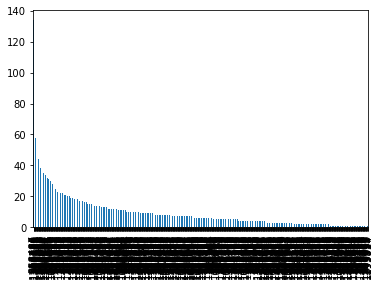

In [15]:
fig, ax = plt.subplots()
rejected_orders['DE_ID'].value_counts().plot(ax=ax, kind='bar')

By plotting number of rejected orders with the DE_ID of the delivery partner, we can clearly see that some delivery partner are rejecting more orders than the others. This could be because of variety of reasons. We should plot the percentage of rejected orders with DE_ID to see if some delivery partners are rejecting more orders than others.

In [78]:
temp1=rejected_orders['DE_ID'].value_counts()
rejected_orders_freq = pd.DataFrame(list(temp1.items()),columns=['DE_ID','rejCount'])

rejected_orders_freq




,DE_ID,rejCount
0,358487,134
1,1336346,79
2,257785,76
3,955179,70
4,1186729,62
...,...,...
862,1249512,1
863,400556,1
864,375535,1
865,1193854,1


In [83]:
temp2=accepted_orders['DE_ID'].value_counts()
accepted_orders_freq = pd.DataFrame(list(temp2.items()),columns=['DE_ID','accCount'])
accepted_orders_freq

,DE_ID,accCount
0,1186729,419
1,939796,418
2,973327,398
3,1249476,398
4,234637,380
...,...,...
980,271295,1
981,369722,1
982,365199,1
983,287060,1


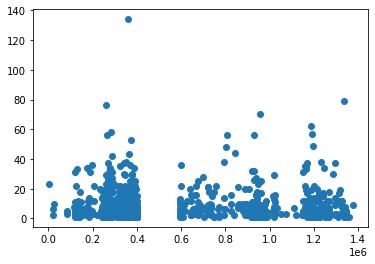

In [80]:
plt.scatter(rejected_orders_freq['DE_ID'], rejected_orders_freq['rejCount'])
plt.show()

<AxesSubplot:xlabel='DE_ID', ylabel='rejCount'>

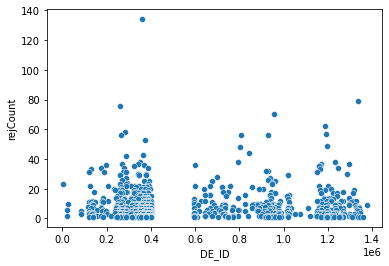

In [81]:

import seaborn as sns
sns.scatterplot(x="DE_ID", y="rejCount", data=rejected_orders_freq)

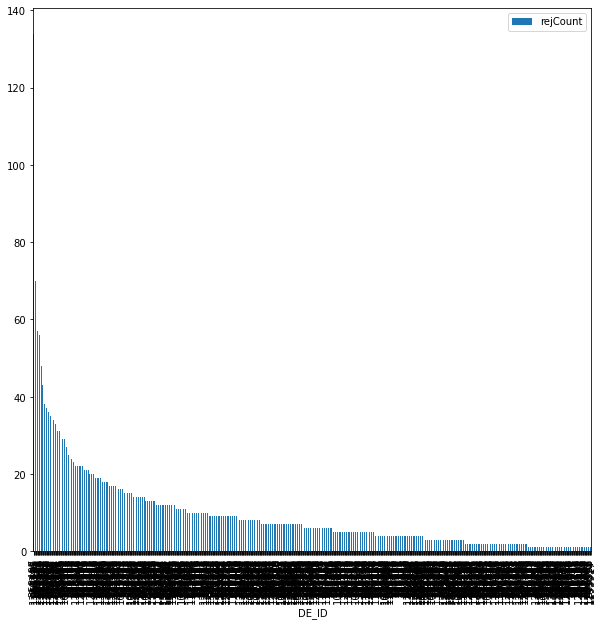

In [82]:
rejected_orders_freq.plot(x="DE_ID", y=["rejCount"],
        kind="bar", figsize=(10, 10))
  

plt.show()

In [108]:
nn=pd.merge(rejected_orders_freq,accepted_orders_freq,how='outer')
nn

,DE_ID,rejCount,accCount
0,358487,134.0,172.0
1,1336346,79.0,169.0
2,257785,76.0,249.0
3,955179,70.0,82.0
4,1186729,62.0,419.0
...,...,...,...
986,285000,NaN,1.0
987,400534,NaN,1.0
988,271295,NaN,1.0
989,365199,NaN,1.0


In [109]:
ll=pd.isnull(nn['accCount'])
nn[ll]

,DE_ID,rejCount,accCount
567,392092,4.0,NaN
654,362456,3.0,NaN
683,339707,2.0,NaN
746,257791,2.0,NaN
759,265878,2.0,NaN
805,1343885,1.0,NaN


In [112]:
nn=nn.fillna(0)

In [113]:
nn['totalOrders']=nn['rejCount']+nn['accCount']
nn

,DE_ID,rejCount,accCount,totalOrders
0,358487,134.0,172.0,306.0
1,1336346,79.0,169.0,248.0
2,257785,76.0,249.0,325.0
3,955179,70.0,82.0,152.0
4,1186729,62.0,419.0,481.0
...,...,...,...,...
986,285000,0.0,1.0,1.0
987,400534,0.0,1.0,1.0
988,271295,0.0,1.0,1.0
989,365199,0.0,1.0,1.0


In [114]:
nn['rejOrderVsTotalOrder']=nn['rejCount']/nn['totalOrders']

In [115]:
nn

,DE_ID,rejCount,accCount,totalOrders,rejOrderVsTotalOrder
0,358487,134.0,172.0,306.0,0.437908
1,1336346,79.0,169.0,248.0,0.318548
2,257785,76.0,249.0,325.0,0.233846
3,955179,70.0,82.0,152.0,0.460526
4,1186729,62.0,419.0,481.0,0.128898
...,...,...,...,...,...
986,285000,0.0,1.0,1.0,0.000000
987,400534,0.0,1.0,1.0,0.000000
988,271295,0.0,1.0,1.0,0.000000
989,365199,0.0,1.0,1.0,0.000000


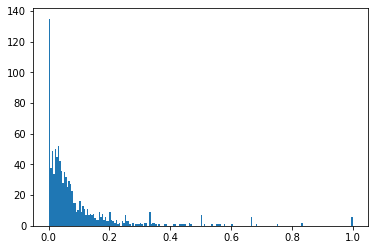

In [127]:
plt.hist(nn['rejOrderVsTotalOrder'],bins=200)
plt.show()

clearly the number of rejected orders are higher in case of some delivery partners

In [129]:
rejected_orders['reject_type'].value_counts()

Type-1    3853
Type-2    2007
Type-3    1449
Type-4     739
Name: reject_type, dtype: int64

In [145]:
rejected_orders

,ORDER_ID,DE_ID,ASSIGNMENT_START_TIME,ASSIGNMENT_END_TIME,reject_ind,reject_type,PLACED_TIME,DELIVERED_TIME,LASTMILE_DISTANCE,FIRSTMILE_DISTANCE,LAST_MILE_TIME_PREDICTED,PAYOUT_MADE_TO_DE,NUM_PING_COUNT_LAST10MIN,LAST_PING_TIME_LAST10MIN,CUSTOMER_ZONE,CUSTOMER_LAT,CUSTOMER_LNG
12,27214,842009,2021-02-17 07:18:39.000,2021-02-17 07:21:39.000,1,Type-2,2021-02-17 07:16:39.820,2021-02-17 08:15:43.000,482.0,344.9,407.5,0.0,5,2021-02-17 07:17:51.000,373.0,37.378988,72.826523
38,67253,1186729,2021-02-24 05:14:34.000,2021-02-24 05:17:33.000,1,Type-2,2021-02-24 05:04:31.363,2021-02-24 05:38:00.000,397.1,447.8,376.5,0.0,9,2021-02-24 05:14:19.000,373.0,37.376211,72.829547
44,81535,1339906,2021-02-26 05:26:33.000,2021-02-26 05:30:30.000,1,Type-1,2021-02-26 05:21:48.465,2021-02-26 05:59:32.000,512.9,336.8,417.0,0.0,65,2021-02-26 05:26:18.000,373.0,37.376206,72.814922
47,86851,263776,2021-02-27 05:32:33.000,2021-02-27 05:35:33.000,1,Type-4,2021-02-27 05:25:10.639,2021-02-27 06:03:22.000,527.3,405.5,410.8,0.0,16,2021-02-27 05:31:27.000,373.0,37.375672,72.800895
56,101742,392348,2021-03-02 02:39:20.000,2021-03-02 02:42:20.000,1,Type-2,2021-03-02 02:32:47.165,2021-03-02 03:32:32.000,556.1,436.7,486.7,0.0,5,2021-03-02 02:31:43.000,373.0,37.376254,72.806285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132288,96558,642496,2021-03-01 02:41:52.000,2021-03-01 03:34:41.034,1,Type-3,2021-03-01 02:38:26.376,2021-03-01 04:07:55.000,448.1,401.9,443.0,0.0,22,2021-03-01 02:41:53.000,374.0,37.361493,72.854304
132340,3906,378703,2021-02-13 04:52:40.000,2021-02-13 04:55:42.000,1,Type-2,2021-02-13 04:34:21.622,2021-02-13 05:15:22.000,371.9,357.5,365.0,0.0,11,2021-02-13 04:51:49.000,374.0,37.373024,72.839131
132345,23364,243161,2021-02-16 22:20:40.000,2021-02-16 22:52:27.000,1,Type-1,2021-02-16 22:13:08.969,2021-02-16 23:20:04.000,425.9,494.6,406.0,0.0,7,2021-02-16 22:18:41.000,374.0,37.372996,72.850286
132386,107834,395956,2021-03-03 03:33:21.000,2021-03-03 03:36:20.000,1,Type-4,2021-03-03 03:27:12.582,2021-03-03 04:08:31.000,460.4,383.6,458.0,0.0,45,2021-03-03 03:32:40.000,374.0,37.366997,72.841034


In [159]:
rejected_orders.index

Int64Index([    12,     38,     44,     47,     56,     72,     73,     80,
                81,     87,
            ...
            132256, 132260, 132261, 132263, 132287, 132288, 132340, 132345,
            132386, 132390],
           dtype='int64', length=8048)

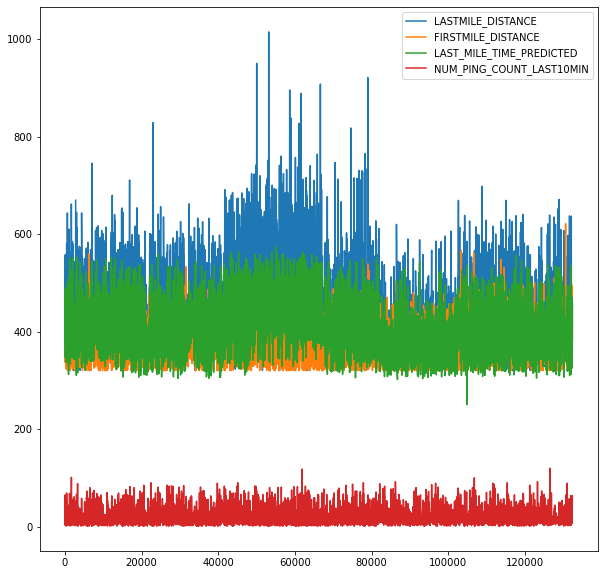

In [146]:
rejected_orders.plot(y=["LASTMILE_DISTANCE","FIRSTMILE_DISTANCE","LAST_MILE_TIME_PREDICTED","NUM_PING_COUNT_LAST10MIN"],
        kind="line", figsize=(10, 10))
  

plt.show()

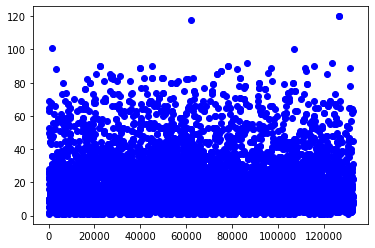

In [164]:
plt.scatter(rejected_orders.index,rejected_orders['NUM_PING_COUNT_LAST10MIN'],c='blue')
plt.show()

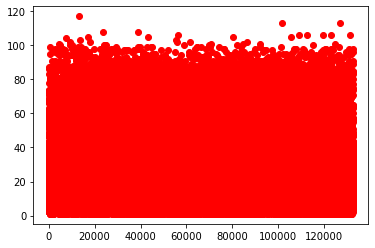

In [165]:
plt.scatter(accepted_orders.index,accepted_orders['NUM_PING_COUNT_LAST10MIN'],c='red')
plt.show()

In [166]:
rejected_orders['NUM_PING_COUNT_LAST10MIN'].mean()

20.105740556660038

In [167]:
accepted_orders['NUM_PING_COUNT_LAST10MIN'].mean()

24.428160133820146

In [168]:
rejected_orders['NUM_PING_COUNT_LAST10MIN'].median()

15.0

In [169]:
accepted_orders['NUM_PING_COUNT_LAST10MIN'].median()

20.0

In [175]:
rejected_orders['LASTMILE_DISTANCE'].median()

441.2

In [176]:
accepted_orders['LASTMILE_DISTANCE'].median()

413.9

On average when the orders were rejected, Last mile distance was more than when the orders were accepted. Thus it could be one the factors affecting the order rejection.

In [178]:
rejected_orders.plot(y=["LASTMILE_DISTANCE"],
        kind="line", figsize=(10, 10))
  
accepted_orders.plot(y=["LASTMILE_DISTANCE"],
        kind="line", figsize=(10, 10))
  
  
plt.show()

AttributeError: 'DataFrame' object has no attribute 'subplot'